In [114]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

In [74]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips, palette="Set2")
# ax.set_title('test, test, test')

In [75]:
def raw_data_to_dataframe(gpu_data_path, cpu_data_path):
    """
    transfer raw data from test to pandas dataframe 
    example data frame: 
    [put_time]  [thread_num]  [platform]
    0.001           10            GPU-MPI
    0.0001          10            OPEN-MPI 
    ...  
    """
    pd_data = pd.DataFrame(columns = ['put_time', 'thread_num', 'platform'])
    # demo 
    # pd_data = pd_data.append({'sending_time': 0.001, 'thread_num': 10, 'platform': 'GPU-MPI'}, ignore_index=True)
    # pd_data = pd_data.append({'sending_time': 0.0001, 'thread_num': 10, 'platform': 'OPEN-MPI'}, ignore_index=True)

    # read gpu test file
    file = open(gpu_data_path, 'r')
    for line in file.readlines():
        elements = line.strip().split()
        # if the line not starts with '#', then ignored
        if len(elements) == 0 or not elements[0] == '#':
            continue

        row = {
            'put_time': float(elements[4]), 
            'thread_num': int(elements[1]) * 2, 
            'platform': 'GPU-MPI'
        }
        pd_data = pd_data.append(row, ignore_index=True)
    file.close()

    # read cpu test file 
    file = open(cpu_data_path, 'r')
    for line in file.readlines():
        elements = line.strip().split()
        # if the line not starts with '#', then ignored
        if len(elements) == 0 or not elements[0] == '#':
            continue

        row = {
            'put_time': float(elements[4]), 
            'thread_num': int(elements[1]) * 2, 
            'platform': 'OPEN-MPI'
        }
        pd_data = pd_data.append(row, ignore_index=True)
    file.close()

    return pd_data

In [100]:
def data_validity_check(data):
    """
    check data validity from the log. 
    e.g. data point number.
    """
    # filter out platform data 
    cuda_mpi_data = data[data['platform'] == 'GPU-MPI']
    cpu_mpi_data = data[data['platform'] == 'CPU-MPI']
    
    # rule 1: data point number for each thread_num should be the same. 
    thread_num = data['thread_num'].unique()
    print('rule 1 check, thread_num = {}'.format(thread_num))
    expected = len(cuda_mpi_data[cuda_mpi_data['platform'] == thread_num[0]])  # init with fisrt #(first cuda data point)
    for n in thread_num:
        assert len(cuda_mpi_data[cuda_mpi_data['platform'] == n]) == len(cpu_mpi_data['platform'] == n) == expected
    
    
    print('congratulations, no error is detected. ')

In [101]:
# read data 
data_path_gpu = 'benchmark_121_put_active_cuda_640_100_300.txt'
data_path_cpu = 'benchmark_121_put_active_cpu_640_100_300.txt'
thread_time_data = raw_data_to_dataframe(data_path_gpu, data_path_cpu)

In [102]:
thread_time_data

,put_time,thread_num,platform
0,0.000928,2,GPU-MPI
1,0.000928,2,GPU-MPI
2,0.000929,2,GPU-MPI
3,0.000929,2,GPU-MPI
4,0.000928,2,GPU-MPI
...,...,...,...
4195,0.000561,60,OPEN-MPI
4196,0.000280,60,OPEN-MPI
4197,0.000561,60,OPEN-MPI
4198,0.000280,60,OPEN-MPI


In [103]:
data_validity_check(thread_time_data)

rule 1 check, thread_num = [2 10 20 30 50 40 60]
congratulations, no error is detected. 


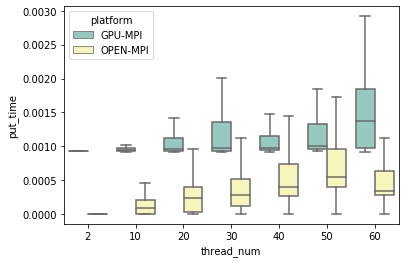

In [119]:
# general box plot
ax = sns.boxplot(x="thread_num", y="put_time", hue='platform', data=thread_time_data, palette="Set3", showfliers=False, whis=1.5)

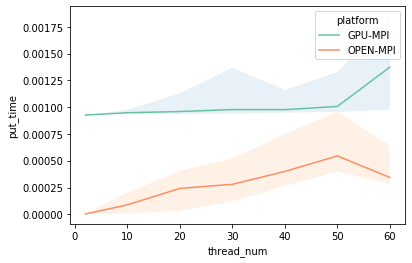

In [123]:
# line plot 
ax = sns.lineplot(x="thread_num", y="put_time", hue='platform', data=thread_time_data, palette="Set2", estimator=np.median, ci=None)
# generate quatile bound manually
for p in thread_time_data['platform'].unique():
    data = thread_time_data[thread_time_data['platform'] == p]
    bounds = data.groupby('thread_num')['put_time'].quantile((0.25,0.75)).unstack()
    ax.fill_between(x=bounds.index,y1=bounds.iloc[:,0],y2=bounds.iloc[:,1],alpha=0.1)

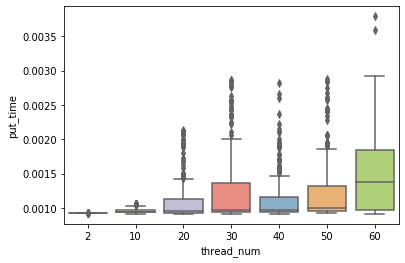

In [85]:
# subplot for gpu put time only 
data_gpu = thread_time_data[thread_time_data['platform'] == 'GPU-MPI']
ax = sns.boxplot(x="thread_num", y="put_time", data=data_gpu, palette="Set3", showfliers=True) 

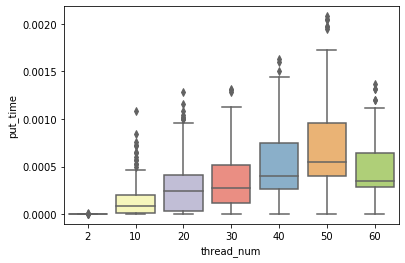

In [86]:
# subplot for cpu put time only 
data_cpu = thread_time_data[thread_time_data['platform'] == 'OPEN-MPI']
ax = sns.boxplot(x="thread_num", y="put_time", data=data_cpu, palette="Set3")

(array([217.,  30.,  20.,   7.,   8.,  10.,   4.,   1.,   1.,   2.]),
 array([0.000917 , 0.0011073, 0.0012976, 0.0014879, 0.0016782, 0.0018685,
        0.0020588, 0.0022491, 0.0024394, 0.0026297, 0.00282  ]),
 <a list of 10 Patch objects>)

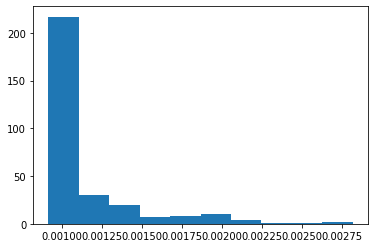

In [108]:
# put time statistics for [gpu] [thread_num = 20/10]
data_select = thread_time_data[thread_time_data['platform'] == 'GPU-MPI']
data_select = data_select[data_select['thread_num'] == 40]
plt.hist(data_select['put_time'])

300

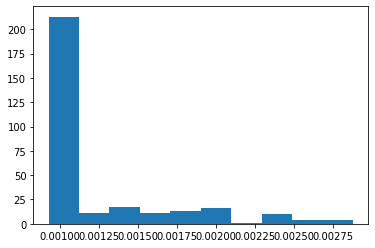

In [107]:
# put time statistics for [gpu] [thread_num = 20/10]
data_select = thread_time_data[thread_time_data['platform'] == 'GPU-MPI']
data_select = data_select[data_select['thread_num'] == 50]
plt.hist(data_select['put_time'])
len(data_select)